# 1. Setup

In [1]:
# This is a setup cell so that Python and R can run in the same Jupyter notebook
# and so that the text of plots is bigger by default.
import altair as alt
import pandas as pd
import numpy as np

# Set a bigger default font size for plots
def bigger_font():
    return {
        'config': {
            'view': {'continuousWidth': 400, 'continuousHeight': 300},
            'legend': {'symbolSize': 14, 'titleFontSize': 14, 'labelFontSize': 14}, 
            'axis': {'titleFontSize': 15, 'labelFontSize': 12},
            'encoding': {'x': {'scale': {'zero': False}}}}}
alt.themes.register('bigger_font', bigger_font)
alt.themes.enable('bigger_font')

# Ensure that altair plots show up in the exported HTML
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
# helper function
def create_cols(years):
    cols = []
    season_mons = {
        "Q1": ["01", "02", "03"],
        "Q2": ["04", "05", "06"],
        "Q3": ["07", "08", "09"],
        "Q4": ["10", "11", "12"],
    }
    for y in years:
        for s, mons in season_mons.items():
            for m in mons:
                if y == 2020 and s == "Q4":
                    break
                if not (y==2020 and m == "09"):
                    cols.append(f"{y}-{m}")
                
            if not (y == 2020 and s == "Q4"):
                cols.append(f"{y}-{s}")
        cols.append(f"{y}")
    return cols


# 2. Load Data

## 1) dataframe cleaning

In [3]:
# mds international students' citizenship
mds_country = ["Iran", "China, People's Republic of", "Kazakhstan", 
               "Korea, Republic of", "India", "France", "Malaysia",
              "Colombia", "Mexico", "Serbia, Republic of", "Turkey",
              "United States of America", "Vietnam", "Nigeria", "Yemen"]

In [4]:
df = pd.read_excel("data/sp_by_citizenship.xls", 
                   skiprows=4, 
                   skipfooter = 6, 
                   index_col=0)

cols = create_cols(list(range(2015, 2021)))
df.columns = cols
df.index.name = 'Citizenship'

df = df.loc[mds_country] # select countries that MDS international students come from

df

,2015-01,2015-02,2015-03,2015-Q1,2015-04,2015-05,2015-06,2015-Q2,2015-07,2015-08,...,2020-03,2020-Q1,2020-04,2020-05,2020-06,2020-Q2,2020-07,2020-08,2020-Q3,2020
Citizenship,,,,,,,,,,,,,,,,,,,,,
Iran,130,105,80,315,100,100,120,320,280,565,...,295,1240,595,1130,755,2445,565,415,975,4515
"China, People's Republic of",3430,2470,2045,7925,2575,3445,4480,10465,9670,18800,...,1890,7010,4995,9080,4145,17915,3255,13015,16250,40290
Kazakhstan,25,15,20,55,25,30,20,75,35,145,...,20,80,30,30,30,90,20,65,85,245
"Korea, Republic of",1225,1020,900,3140,965,880,1065,2910,2135,2650,...,650,3135,800,1545,705,3010,650,1320,1965,7865
India,1290,565,775,2620,2145,1625,745,4510,2220,9435,...,3900,16105,5710,6895,3645,16105,2905,12870,15770,47220
France,795,275,260,1325,270,320,350,935,1125,6105,...,235,1375,400,535,210,1135,280,1265,1545,3975
Malaysia,25,20,10,55,25,25,35,85,60,215,...,20,65,30,30,10,70,15,75,90,215
Colombia,220,85,65,370,75,55,95,225,125,240,...,240,1110,205,400,250,845,185,105,285,2130
Mexico,290,145,110,545,170,155,200,525,315,1265,...,215,1000,225,300,145,665,135,510,645,2245


## 2) separate columns

In [5]:
def get_total_cols(years):
    cols = []
    seasons = ["Q1", "Q2", "Q3", "Q4"]
    for y in years:
        for s in seasons:
            if y == "2020" and s == "Q4":
                break
            cols.append(f"{y}-{s}")
    return cols  

y_total_cols = [str(x) for x in list(range(2017, 2021))] 

s_total_cols = get_total_cols(y_total_cols)

s_total_cols

['2017-Q1',
 '2017-Q2',
 '2017-Q3',
 '2017-Q4',
 '2018-Q1',
 '2018-Q2',
 '2018-Q3',
 '2018-Q4',
 '2019-Q1',
 '2019-Q2',
 '2019-Q3',
 '2019-Q4',
 '2020-Q1',
 '2020-Q2',
 '2020-Q3']

In [6]:
# l1 = df.columns.get_level_values(1)
# l2 = df.columns.get_level_values(2)
# mon_con = ((l1.isin(y_total_cols)) | (l2.isin(s_total_cols)))
# mons = df.loc[:, ~mon_con]



seasons = df[s_total_cols]
years = df[y_total_cols]
months = df[df.columns.difference(s_total_cols + y_total_cols + create_cols([2015, 2016]))]


seasons_t = seasons.T.reset_index().rename(columns={"index": "time"})
years_t = years.T.reset_index().rename(columns={"index": "time"})
months_t = months.T.reset_index().rename(columns={"index": "time"})

In [7]:
melt_season_data = seasons_t.melt(id_vars="time",   # Column(s) to use as identifier variables.
                        var_name="Country", 
                        value_name="Number")
melt_months_data = months_t.melt(id_vars="time",   # Column(s) to use as identifier variables.
                        var_name="Country", 
                        value_name="Number")

melt_year_data = years_t.melt(id_vars="time",   # Column(s) to use as identifier variables.
                        var_name="Country", 
                        value_name="Number")

melt_months_data

,time,Country,Number
0,2017-01,Iran,250
1,2017-02,Iran,145
2,2017-03,Iran,150
3,2017-04,Iran,240
4,2017-05,Iran,205
...,...,...,...
655,2020-04,Yemen,30
656,2020-05,Yemen,40
657,2020-06,Yemen,15
658,2020-07,Yemen,25


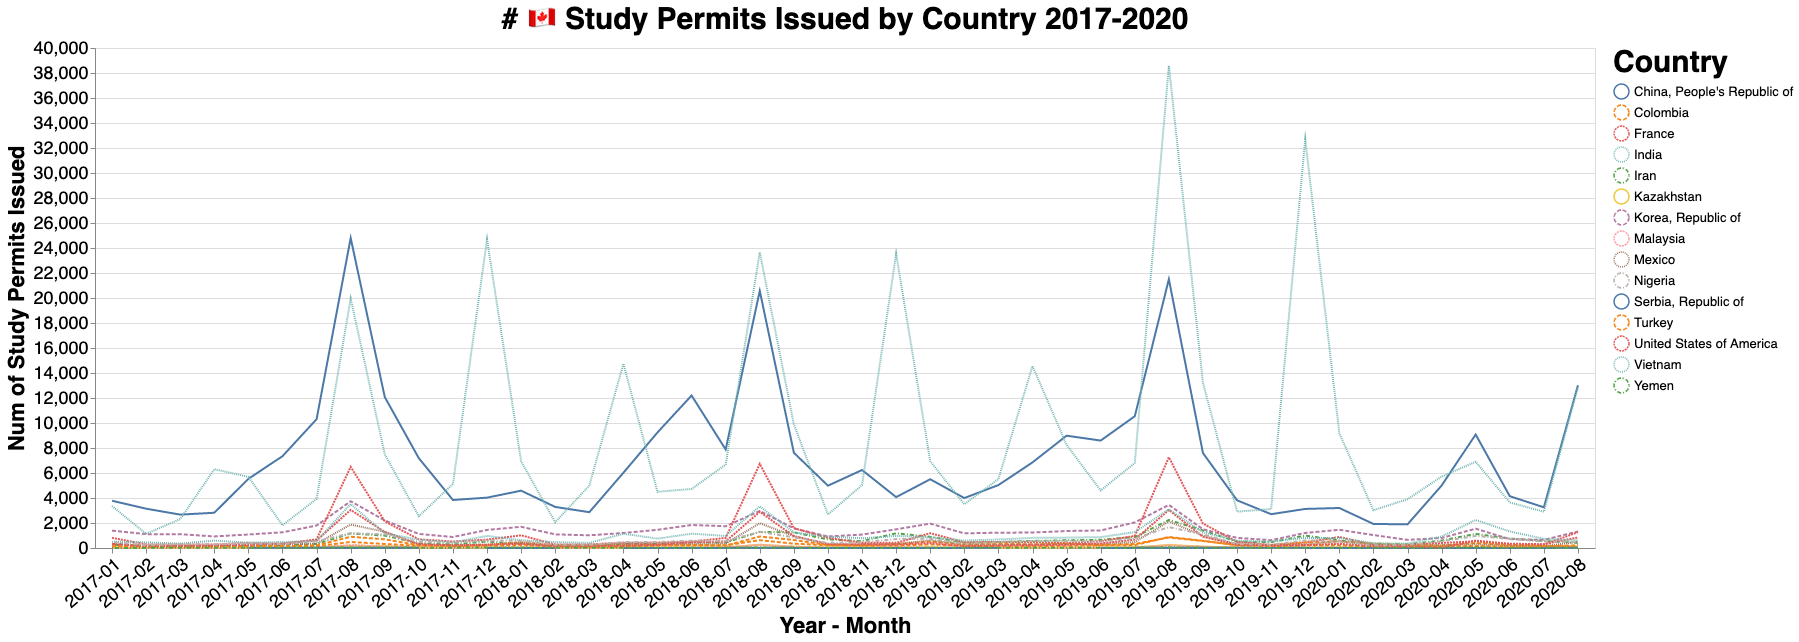

In [14]:
def plot_for_me(data, x_title):

    base = alt.Chart(
        data, title="# 🇨🇦 Study Permits Issued by Country 2017-2020"
    ).encode(
        alt.X("time", title=x_title, axis=alt.Axis(labelAngle=-40)),
        alt.Y("Number:Q", title="Num of Study Permits Issued"),
        alt.Tooltip("Country"),
        alt.Color("Country", legend=alt.Legend(title="Country", symbolSize=220)),
        strokeDash="Country",
    )

    highlight = alt.selection(
        type="single", on="mouseover", fields=["Country"], nearest=True
    )

    points = (
        base.mark_circle()
        .encode(opacity=alt.value(0))
        .add_selection(highlight)
        .properties(width=1500)
    )

    lines = base.mark_line().encode(
        size=alt.condition(~highlight, alt.value(2), alt.value(4)),
    )


    plot = (
        (points + lines)
        .properties(width=150, height=500)
        .configure_axis(labelFontSize=18, titleFontSize=22)
        .configure_title(fontSize=30)
        .configure_legend(labelFontSize=13, titleFontSize=30)
    )

    return plot


plot_for_me(data=melt_months_data, x_title="Year - Month")